# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-6 (46일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

####  예제들과 관련한 정리 (http://darkpgmr.tistory.com/105)
지금까지는 내용을 예제로서만 설명을 하여 따라갔지만, 그 이유에 대해서 간략하게 설명하고, 다음 SVD 관련 정리합니다.

주성분 분석 예제는 (http://rfriend.tistory.com/61?category=601862) 에서 가져 왔습니다. 잘 정리 되어 있어서 PCA 를 어떻게 활용하는지를 살펴보는데 정리가 잘되어 있습니다. 그대로 가지고 왔습니다.

* 주성분 분석은 전체 변동을 가장 많이 설명할 수 있는 소수의 주성분 또는 요인으로 차원을 축소하여 데이터를 이해하기 쉽게 할 수 있는 기법입니다. 이런 내용을 이해하기 위해서는 기본적으로 고유값, 고유벡터등의 기본 지식을 이해 하고 있어야 합니다.
* 먼저 복잡한 이론내용 보다는 간단한 예제로서 무엇을 하고자 하는 것인지 먼저 설명 하고자 합니다.
* 이후에 이론을 간단히 설명하고, 추가 적인 내용을 설명하고자 합니다.

* 주성분 분석에서는 
   * 상관행렬과 공분산 행렬중 어는것을 선택할 것인가?
   * 주성분의 갯수를 몇개로 할 것인가?
   * 주성분에 영향을 미치는 변소로 어떤 변수를 선택할 것인가
* 에 대해서 결정해야 합니다.

* 여기서는 2007년3.31 일자 국내 증권회사 주요 재무제표 를 가지고 주성분 분석을 하도록 합니다.
   * 이 데이터는 18개 증권사 별로 
       * V1: 총자본 순이익율
       * V2: 자기자본 순 이익율
       * V3: 자기자본 비율
       * V4: 부채비율
       * V5: 자기자본 회전율
   * 등의 재무지표 변수로 구성 되어 있습니다.

In [2]:
# R 로 외부데이터 불러 오기
secu_com_finance_2007 = read.csv("secu_com_finance_2007.csv", header = TRUE, stringsAsFactors = FALSE)

In [3]:
str(secu_com_finance_2007)
# V1: 총자본순이익율
# V2: 자기자본순이익율
# V3: 자기자본 비율
# V4: 부채비율
# V5: 자기자본 회전율

'data.frame':	18 obs. of  6 variables:
 $ company: chr  "SK증권" "교보증권" "대신증권" "대우증권" ...
 $ V1     : num  2.43 3.09 2.22 5.76 1.6 3.53 4.26 3.86 4.09 2.73 ...
 $ V2     : num  11.1 9.95 6.86 23.19 5.64 ...
 $ V3     : num  18.5 29.5 28.6 23.5 25.6 ...
 $ V4     : num  442 239 249 326 290 ...
 $ V5     : num  0.9 0.9 0.69 1.43 1.42 1.17 0.81 0.81 0.32 0.64 ...


주성분 분석에서는 변수별로 단위가 다르기 때문에, 평균과 표준편차를 이용하여 표준화한 데이터를 사용하게 됩니다.

In [4]:
# 표준화 변환
secu_com_finance_2007 = transform(secu_com_finance_2007, 
                                  V1_s = scale(V1), 
                                  V2_s = scale(V2), 
                                  V3_s = scale(V3), 
                                  V4_s = scale(V4), 
                                  V5_s = scale(V5))

In [5]:
str(secu_com_finance_2007)

'data.frame':	18 obs. of  11 variables:
 $ company: chr  "SK증권" "교보증권" "대신증권" "대우증권" ...
 $ V1     : num  2.43 3.09 2.22 5.76 1.6 3.53 4.26 3.86 4.09 2.73 ...
 $ V2     : num  11.1 9.95 6.86 23.19 5.64 ...
 $ V3     : num  18.5 29.5 28.6 23.5 25.6 ...
 $ V4     : num  442 239 249 326 290 ...
 $ V5     : num  0.9 0.9 0.69 1.43 1.42 1.17 0.81 0.81 0.32 0.64 ...
 $ V1_s   : num  -0.5327 0.0484 -0.7176 2.3994 -1.2635 ...
 $ V2_s   : num  0.383 0.131 -0.545 3.029 -0.812 ...
 $ V3_s   : num  -0.918 -0.312 -0.358 -0.642 -0.522 ...
 $ V4_s   : num  1.33896 -0.07493 -0.00551 0.53092 0.27847 ...
 $ V5_s   : num  0.0507 0.0507 -0.5297 1.5155 1.4879 ...


V1.총자본순이익율, V2.자기자본순이익율, V3.자기자본비율, V5.자기자본회전율 등 4개의 변수와 V4 부채비율은 다른 방향으로 움직일 것입니다. V1,V2,V3,V5 와 다르게 V5은 낮을 수록 좋은 의미를 가질것이기 때문에 전체가 같은 방향으로 움직에 하기 위해서 V4 부채비율의 방향을 변환하도록 합니다.
* 표준화된 이후 값의 최대값 에서 표준화된 이후의 관찰값을 빼. 따라서 V4 의 값이 클수록 부채비율이 낮은것을 의미 하도록 합니다. 이것을 V4_s2 로 인텍싱


In [6]:
# 부채비율(V4_s)을 방향(max(V4_s)-V4_s) 변환
secu_com_finance_2007 = transform(secu_com_finance_2007, 
                                  V4_s2 = max(V4_s) - V4_s)

In [7]:
str(secu_com_finance_2007)

'data.frame':	18 obs. of  12 variables:
 $ company: chr  "SK증권" "교보증권" "대신증권" "대우증권" ...
 $ V1     : num  2.43 3.09 2.22 5.76 1.6 3.53 4.26 3.86 4.09 2.73 ...
 $ V2     : num  11.1 9.95 6.86 23.19 5.64 ...
 $ V3     : num  18.5 29.5 28.6 23.5 25.6 ...
 $ V4     : num  442 239 249 326 290 ...
 $ V5     : num  0.9 0.9 0.69 1.43 1.42 1.17 0.81 0.81 0.32 0.64 ...
 $ V1_s   : num  -0.5327 0.0484 -0.7176 2.3994 -1.2635 ...
 $ V2_s   : num  0.383 0.131 -0.545 3.029 -0.812 ...
 $ V3_s   : num  -0.918 -0.312 -0.358 -0.642 -0.522 ...
 $ V4_s   : num  1.33896 -0.07493 -0.00551 0.53092 0.27847 ...
 $ V5_s   : num  0.0507 0.0507 -0.5297 1.5155 1.4879 ...
 $ V4_s2  : num  0.217 1.631 1.562 1.026 1.278 ...


In [8]:
# 분석할 변수 선택
secu_com_finance_2007_2 <- secu_com_finance_2007[,c("company", "V1_s", "V2_s", "V3_s", "V4_s2", "V5_s")]

In [9]:
str(secu_com_finance_2007_2)

'data.frame':	18 obs. of  6 variables:
 $ company: chr  "SK증권" "교보증권" "대신증권" "대우증권" ...
 $ V1_s   : num  -0.5327 0.0484 -0.7176 2.3994 -1.2635 ...
 $ V2_s   : num  0.383 0.131 -0.545 3.029 -0.812 ...
 $ V3_s   : num  -0.918 -0.312 -0.358 -0.642 -0.522 ...
 $ V4_s2  : num  0.217 1.631 1.562 1.026 1.278 ...
 $ V5_s   : num  0.0507 0.0507 -0.5297 1.5155 1.4879 ...


변수들간의 상관계수를 분석해 보겠습니다. 주성분 분석이 변수들 간의 상관관계가 높다는 것을 가정했으므로 확인해봅니다.

In [10]:
# 상관계수 분석
round(cor(secu_com_finance_2007_2[,-1]),3)

,V1_s,V2_s,V3_s,V4_s2,V5_s
V1_s,1.000,0.617,0.324,0.355,0.014
V2_s,0.617,1.000,-0.512,-0.466,0.423
V3_s,0.324,-0.512,1.000,0.937,-0.563
V4_s2,0.355,-0.466,0.937,1.000,-0.540
V5_s,0.014,0.423,-0.563,-0.540,1.000


결과를 보면, V1 과 V2 이 상관계수가 높고(0.616), V3, V4 가 상관계수가 높고(0.937), V5는 V2 와 상관관계가 높고, V3, V4 와는 역의 상관관계가 보입니다. 이것을 말로 풀면
* 총자본순이익율은 자기자본순이익률과 상관관계가 0.615 로 높고: V1,V2
* 자기자본비율과 역부책비율은 상관관계가 0.936 으로 높고: V3,V4
* 자기자본회전율은 자기자본순이익율 (0.423) 으로 높고, 자기자본비율(-0.563), 역부채비율(-0.540) 으로 역상관관계가 있습니다.:V5,V2 : V5,-V3 and V5, -V4

변수들간의 산점도 를 살펴봅니다.

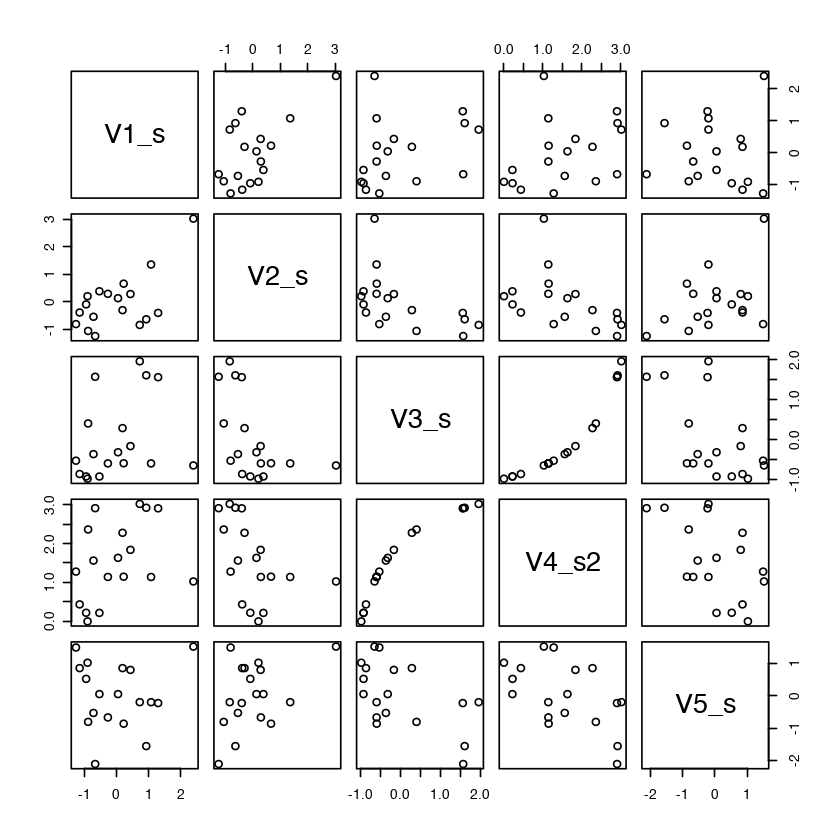

In [11]:
# Scatter plot matrix
plot(secu_com_finance_2007_2[,-1])

prcomp() 함수를 이용해서 주성분 분석을 실시합니다.

In [12]:
# 주성분분석 PCA(Principal Component Analysis)
secu_prcomp = prcomp(secu_com_finance_2007_2[,c(2:6)])

In [13]:
secu_prcomp

Standard deviations (1, .., p=5):
[1] 1.6617648 1.2671437 0.7419994 0.2531070 0.1351235

Rotation (n x k) = (5 x 5):
              PC1         PC2           PC3          PC4         PC5
V1_s   0.07608427 -0.77966993  0.0008915975 -0.140755404  0.60540325
V2_s  -0.39463007 -0.56541218 -0.2953216494  0.117644166 -0.65078503
V3_s   0.56970191 -0.16228156  0.2412221065 -0.637721889 -0.42921686
V4_s2  0.55982770 -0.19654293  0.2565972887  0.748094314 -0.14992183
V5_s  -0.44778451 -0.08636803  0.8881182665 -0.003668418 -0.05711464

In [14]:
summary(secu_prcomp)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     1.6618 1.2671 0.7420 0.25311 0.13512
Proportion of Variance 0.5523 0.3211 0.1101 0.01281 0.00365
Cumulative Proportion  0.5523 0.8734 0.9835 0.99635 1.00000

위 결과를 보면 누적기여율 (Cumulative Proportion) 에 제1주성분 PC1 이 55.23%, 제2주성분까지(PC1, PC2) 누적기여율이 87.34% 로 매우 높게 나왔습니다.  
  
주성분 분석 결과를 출력해봅니다. 

In [15]:
print(secu_prcomp)

Standard deviations (1, .., p=5):
[1] 1.6617648 1.2671437 0.7419994 0.2531070 0.1351235

Rotation (n x k) = (5 x 5):
              PC1         PC2           PC3          PC4         PC5
V1_s   0.07608427 -0.77966993  0.0008915975 -0.140755404  0.60540325
V2_s  -0.39463007 -0.56541218 -0.2953216494  0.117644166 -0.65078503
V3_s   0.56970191 -0.16228156  0.2412221065 -0.637721889 -0.42921686
V4_s2  0.55982770 -0.19654293  0.2565972887  0.748094314 -0.14992183
V5_s  -0.44778451 -0.08636803  0.8881182665 -0.003668418 -0.05711464


* 제일 요인 표준편차가 1.66 으로 가장 크고, 제2요인이 1.26 으로 그 다음으로 크기별 순서로 되어 있습니다.
* Rotation 후 고유벡터 계수를 보면 
    * 제 1 요인(PC1) 은 자기자본 비율(V3), 역부채비율(V4) 와 관계 있고  ==> 수익성
    * 제 2 요인(PC2) 은 총자기자본비율(V1), 자기자본순이익율(V2) 과 관계 있고  ==> 안정성
    * 제 3 요인(PC3) 은 자기자본회전율(V5) 와 관련이 있음을 알 수 있다.   ==> 활동성
    
* 주성분 갯수를 정할때 
    * 누적기여율을 이용하는 것
    * 고유값을 이용하여 다음처럼 그래프를 그려서 고육값 곡선이 꺽이는 지점앞의 주성분 갯수를 선택함.
    * 아래 그래프를 보면 주성분 4개째에서 수평으로 드러누웠으므로 4 -1 =3 개의 주성분을 정한다.

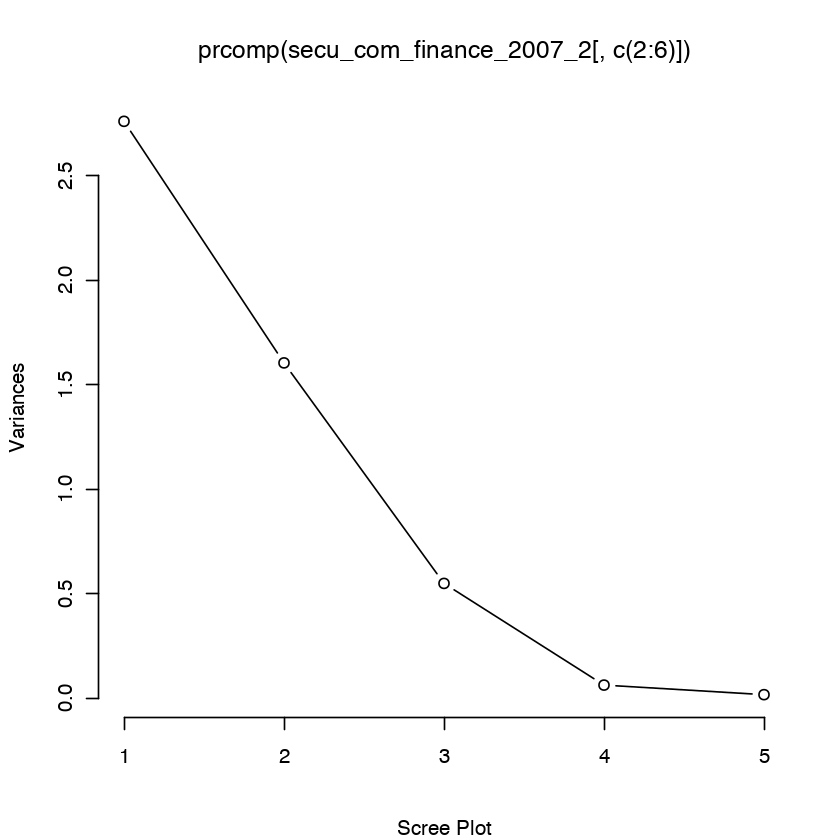

In [18]:
# Scree Plot
plot(prcomp(secu_com_finance_2007_2[,c(2:6)]), type="l", sub = "Scree Plot")

제1 주성분, 제2 주성분을 가지고 Biplot 을 그려봅니다.

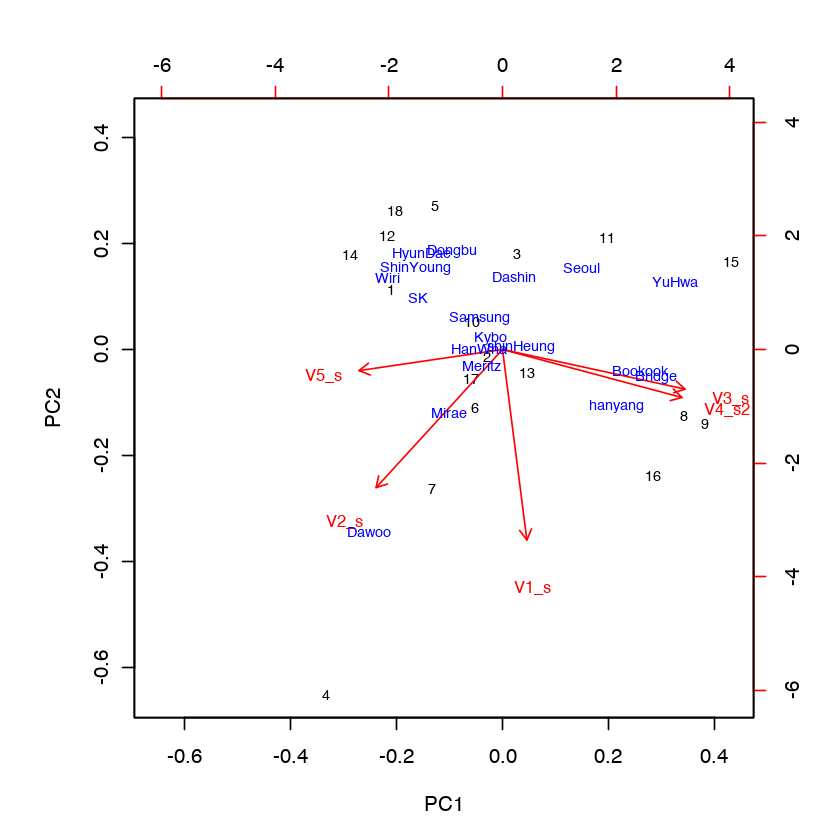

In [31]:
# Biplot
#par(family="NanumGothic")  # 한글 폰트 설정
options(warn=-1)  # 워닝 disable

biplot(prcomp(secu_com_finance_2007_2[,c(2:6)]), cex = c(0.7, 0.8))

# 관측치별 주성분1, 주성분2 점수 계산(PC1 score, PC2 score)
secu_pc1 = predict(secu_prcomp)[,1]
secu_pc2 = predict(secu_prcomp)[,2]


# 관측치별 이름 매핑(rownames mapping)
# biplot 에서 한글문제 해결은 나중에..
company = c("SK", "Kybo", "Dashin", "Dawoo", "Dongbu", "Meritz","Mirae", "Bookook", "Bridge", "Samsung", "Seoul", "ShinYoung", "shinHeung", "Wiri", "YuHwa", "hanyang", "HanWha", "HyunDae")
# print(secu_com_finance_2007_2$company)
#text(secu_pc1, secu_pc2, labels = secu_com_finance_2007_2$company, cex = 0.7, pos = 3, col = "blue", family="NanumGothic")
text(secu_pc1, secu_pc2, labels = company, cex = 0.7, pos = 3, col = "blue", family="NanumGothic")

options(warn=0)  # 워닝 disable

* 가로축을 PC1(안정성) 을 기준으로 보면 오른쪽에 V3, V4 화살표가 있는 쪽에 부국증권, 한양증권, 유화증권은 안정성이 높은 회사군이라고 해석됩니다.
* (**PC1** = 0.076*V1_s - 0.394*V2_s + **0.569*V3_s** + **0.559*V4_s2** - 0.447*V5_s )
* 세로축 PC2(수익성) 을 기준으로 보면 아래쪽에 있는ㄴ 대우증권, 미래에셋증권사 등이 수익성이 좋은 축에 들어갑니다.
* (**PC2** = -**0.779*V1_s** - **0.565*V2_s** - 0.162*V3_s - 0.196*V4_s2 - 0.086*V5_s)

마지막으로 변수에 대한 설명력의 누적기여율(cummulative proportion)이 80%가 되는 주성분의 개수 k개를 찾아서, 주성분 1번부터 주성분 k번째까지의 주성분점수를 반환하는 사용자 정의함수는 아래와 같습니다.

In [32]:
###########################################################
## PCA (Principal Component Analysis)
## User Defined Function
## - finding PC k which Cumulative Proportion is over 0.8
###########################################################
pca <- function(dataset){ 
    pc = prcomp(dataset, scale = TRUE)
    k = 0
    R = 0
    while(R < 0.8) {
        k = k + 1
        R = sum(pc[[1]][1:k]^2)/sum(pc[[1]]^2)
        cat("When number of Principal Component(k) is ", k,
            ", Cumulative Proportion(R) is ", R, "\n", "\n", sep="")
        }
    
    SelectedDataSet = pc[[5]][,1:k]
    return(SelectedDataSet)
}

pca(secu_com_finance_2007_2[,c(2:6)])


When number of Principal Component(k) is 1, Cumulative Proportion(R) is 0.5522924

When number of Principal Component(k) is 2, Cumulative Proportion(R) is 0.8734231



PC1,PC2
-1.4870243,0.6066594
-0.2063797,-0.0804627
0.1968538,0.9704605
-2.3542884,-3.5056480
-0.8953707,1.4552899
-0.3682082,-0.5976313
-0.9354306,-1.4144519
2.4129728,-0.6785064
2.6991862,-0.7596591
-0.4050098,0.2800099


다음에도 PCA 관련 다양한 그래픽 표현방법에 대해서 정리 할 것입니다.